# Trees and Forests

In [1]:
%matplotlib notebook
from preamble import *

Decision Tree Classification
==================


<IPython.core.display.Javascript object>


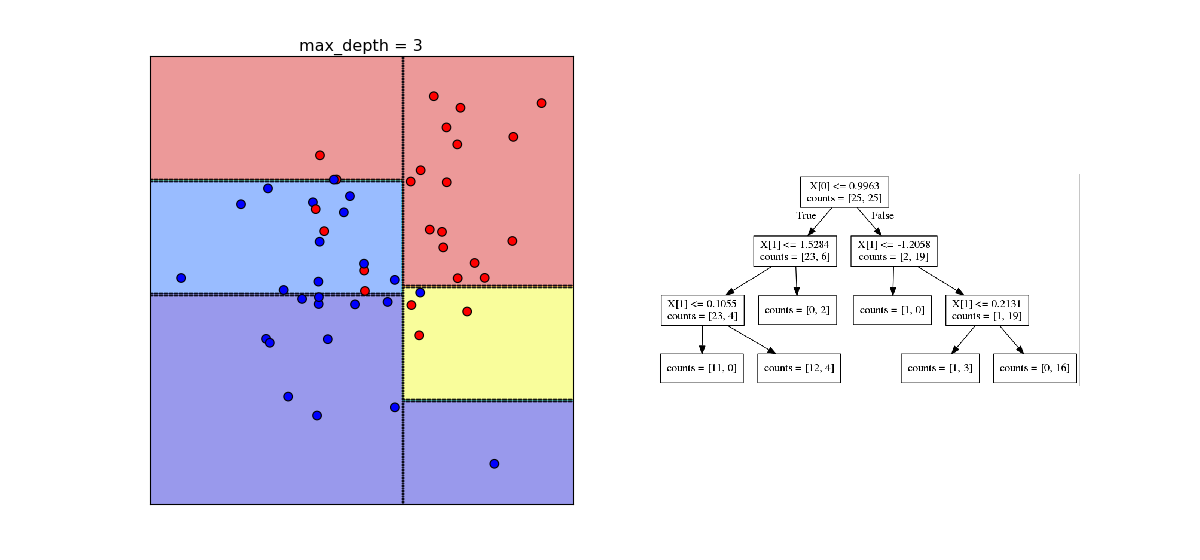

In [2]:
from plots import plot_tree_interactive
plot_tree_interactive()

## Random Forests

<IPython.core.display.Javascript object>


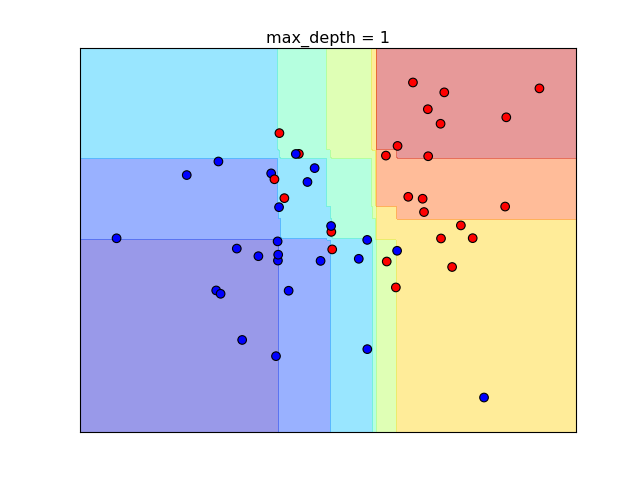

In [3]:
from plots import plot_forest_interactive
plot_forest_interactive()

<IPython.core.display.Javascript object>


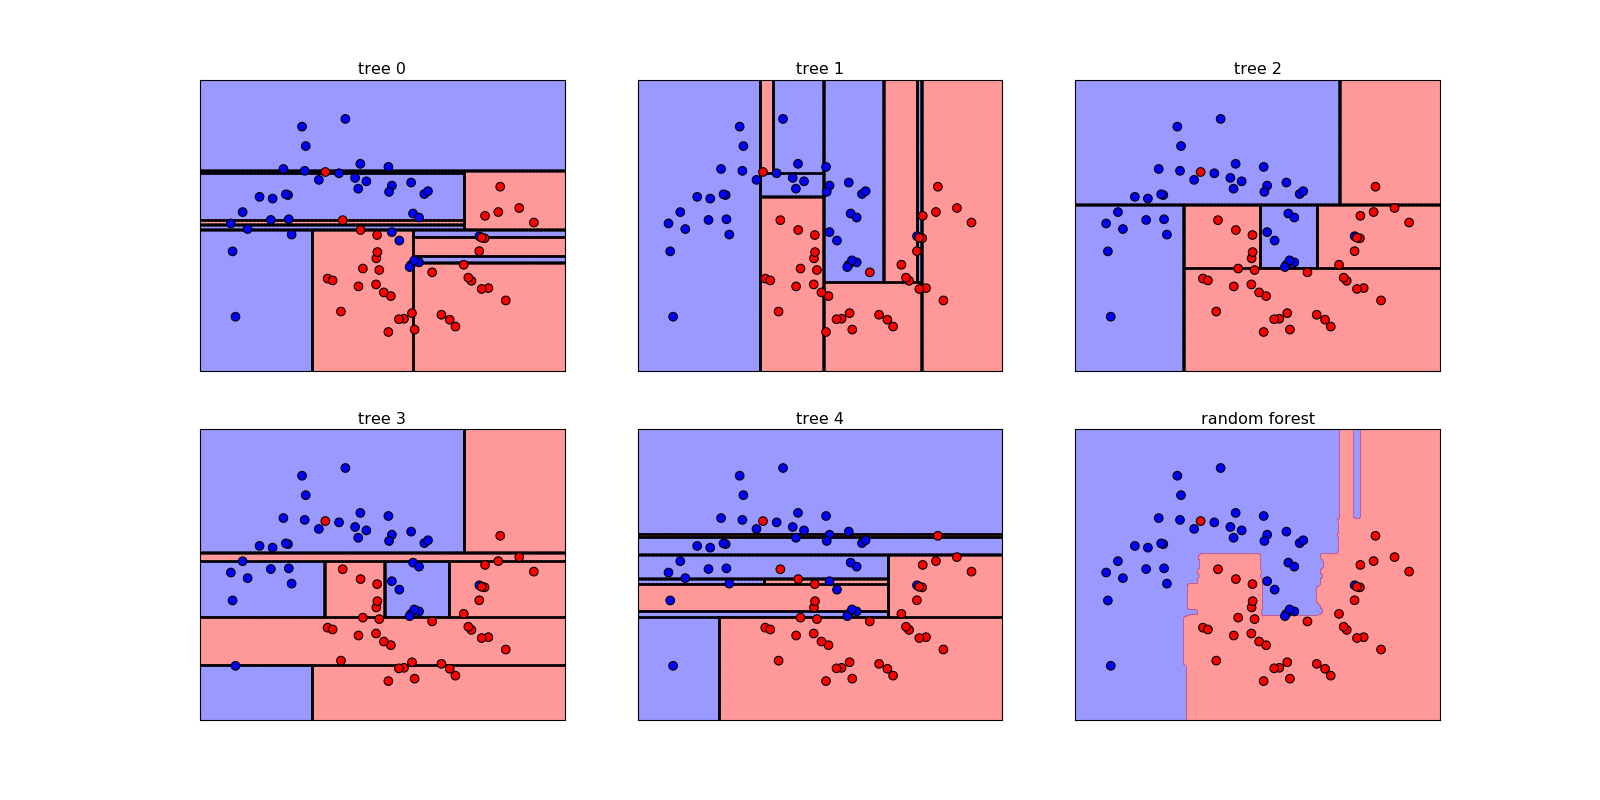

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

## Selecting the Optimal Estimator via Cross-Validation

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[5, 7, 9]}

grid = GridSearchCV(rf, parameters, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [6]:
grid.score(X_train, y_train)

0.97990908285331924

In [7]:
grid.score(X_test, y_test)

0.71991479649215218

# Exercises
Compare training and test performance of the decision tree (``sklearn.tree.DecisionTreeRegressor``) and random forest on the bike dataset.
What is the effect of changing ``max_depth`` to training and test set score?
How do the feature importances of trees and forest differ?
Use ``mglearn.tools.get_tree`` to visualize a decision tree.